In [69]:
import numpy as np
import pandas as pd

import pycaret as pc
from pycaret.classification import *

In [70]:
# read and prepare the dataframe:

miccai_3dt1 = pd.read_csv('CSV-Dasets/MICCAI_3DT1.csv')

wmh_3dt1 = pd.read_csv('CSV-Dasets/WMH_3DT1.csv')

lesions = pd.DataFrame()
lesions = lesions.append(miccai_3dt1, ignore_index=True)
lesions = lesions.append(wmh_3dt1, ignore_index=True)

classification = lesions['class']

del lesions['Patient_ID']
del lesions['class']

lesions

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,gradient_Mean,gradient_Median,gradient_Minimum,gradient_Range,gradient_RobustMeanAbsoluteDeviation,gradient_RootMeanSquared,gradient_Skewness,gradient_TotalEnergy,gradient_Uniformity,gradient_Variance
0,0.407732,0.290469,5.054360,17.400694,8.944272,19.235384,19.104973,19.339080,328.458333,7.094827,...,32.280604,32.649654,0.500000,73.385048,9.096324,35.795741,0.218267,4.369353e+05,0.056148,239.297661
1,0.888132,0.386957,7.098590,18.344665,18.439089,22.360680,19.416488,23.043437,1043.458333,16.292481,...,21.461119,19.274336,0.500000,55.822731,12.578102,26.969054,0.372512,7.760610e+05,0.083963,266.750284
2,0.534254,0.354698,4.937926,13.921476,14.866069,14.035669,9.219544,14.899664,302.875000,7.437605,...,22.407986,23.170545,0.500000,52.617794,11.498493,27.235117,0.175313,2.343935e+05,0.080055,239.633742
3,0.853141,0.567629,4.217099,7.429317,8.000000,8.062258,8.246211,8.602325,126.791667,6.338255,...,24.592643,28.893993,0.000000,54.002316,13.279176,30.041669,-0.133856,1.209352e+05,0.115393,297.703765
4,0.436164,0.356494,7.756507,21.757732,13.601471,23.323808,19.026298,24.041631,868.750000,9.489940,...,23.231363,18.927494,1.000000,59.049980,10.708517,28.139057,0.567296,7.039160e+05,0.063353,252.110319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.390702,0.274130,17.015346,62.070396,36.496575,68.796802,37.643060,72.842295,7261.625000,24.251008,...,16.275662,7.390868,0.000000,56.879257,10.951537,21.952427,0.712983,3.527574e+06,0.133597,217.011876
190,0.486735,0.401294,23.187737,57.782451,41.868843,65.192024,54.405882,67.985293,11479.500000,28.124747,...,14.487448,5.787919,0.000000,57.210140,10.353922,20.554052,0.889334,4.897684e+06,0.153212,212.582875
191,0.554922,0.332832,7.386873,22.194002,19.697716,21.023796,16.278821,28.442925,1184.083333,12.315951,...,17.540301,6.819091,0.500000,54.073345,12.414455,23.521399,0.509312,6.688867e+05,0.146867,245.594054
192,0.537882,0.330290,4.927163,14.917687,11.180340,18.601075,12.369317,18.627936,350.708333,8.023962,...,16.496752,17.649363,1.414214,41.904375,8.369924,20.018194,0.165743,1.462658e+05,0.117088,128.585255


### Exploratory Data Analysis: Shape Features Correlation

In [71]:
shape_features = list(filter(lambda x: 'shape' in x, lesions.columns))
len(shape_features)
#shape_features

14

In [72]:
non_shape_features = list(filter(lambda x: 'shape' not in x, lesions.columns))
len(non_shape_features)

147

In [73]:
corr_matrix = lesions.corr()
corr_matrix = corr_matrix[non_shape_features]
#del corr_matrix[shape_features]
corr_matrix = corr_matrix[corr_matrix.index.isin(shape_features)]
#type(corr_matrix)

In [74]:
corr_matrix

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,gradient_Mean,gradient_Median,gradient_Minimum,gradient_Range,gradient_RobustMeanAbsoluteDeviation,gradient_RootMeanSquared,gradient_Skewness,gradient_TotalEnergy,gradient_Uniformity,gradient_Variance
original_shape_Elongation,0.076684,0.029453,0.078586,-0.070778,-0.039451,0.079905,-0.005433,-0.045304,0.046854,0.031338,...,-0.171378,-0.171586,-0.001312,0.030610,0.088088,-0.099317,0.223299,0.028522,0.191654,0.079714
original_shape_Flatness,0.064042,0.010545,-0.089259,-0.149747,-0.038845,0.081246,-0.093349,-0.050518,0.050468,0.054894,...,-0.170243,-0.185784,-0.028416,-0.060360,0.148532,-0.083374,0.229073,-0.151647,0.283380,0.148415
original_shape_LeastAxisLength,-0.220288,-0.131172,0.783528,0.247164,0.035905,0.058199,0.238556,0.095723,-0.257603,-0.297786,...,-0.659886,-0.662547,-0.407219,0.293222,-0.241746,-0.546189,0.754480,0.753823,0.356504,-0.164633
original_shape_MajorAxisLength,-0.196382,-0.089525,0.729854,0.304738,0.049954,-0.002748,0.285016,0.106856,-0.213326,-0.246740,...,-0.391626,-0.414979,-0.345582,0.303454,-0.251780,-0.352810,0.428160,0.770866,0.052765,-0.193608
original_shape_Maximum2DDiameterColumn,-0.180358,-0.072984,0.832699,0.303114,0.055752,0.022288,0.316937,0.106616,-0.220279,-0.273986,...,-0.545707,-0.553132,-0.358075,0.363158,-0.238467,-0.457317,0.625909,0.828370,0.192186,-0.168707
original_shape_Maximum2DDiameterRow,-0.155296,-0.091983,0.765064,0.282345,-0.005053,0.034265,0.290981,0.057140,-0.190480,-0.226713,...,-0.435078,-0.456356,-0.348349,0.313376,-0.211198,-0.376232,0.455162,0.795369,0.101503,-0.172028
original_shape_Maximum2DDiameterSlice,-0.159377,-0.057404,0.790751,0.256739,0.021841,0.048394,0.294861,0.090960,-0.170746,-0.204492,...,-0.440016,-0.477350,-0.371464,0.325301,-0.210590,-0.369007,0.510744,0.811977,0.156642,-0.138766
original_shape_Maximum3DDiameter,-0.189564,-0.101670,0.783786,0.301524,0.030079,0.013550,0.299498,0.088861,-0.223421,-0.264921,...,-0.453142,-0.469173,-0.358540,0.322706,-0.254148,-0.398998,0.495205,0.812911,0.107344,-0.197217
original_shape_MeshVolume,-0.223255,-0.112060,0.904494,0.270114,0.052969,0.052575,0.302815,0.119112,-0.251950,-0.293837,...,-0.572484,-0.557734,-0.365600,0.342194,-0.282872,-0.484454,0.697422,0.881476,0.285516,-0.178593
original_shape_MinorAxisLength,-0.161743,-0.082989,0.882703,0.273054,0.017134,0.065926,0.308858,0.078779,-0.207480,-0.259405,...,-0.563017,-0.581800,-0.382032,0.356582,-0.224905,-0.466249,0.635478,0.876927,0.222822,-0.158492


#### Identifying and Eliminating shape-correllated features

In [75]:
corr_matrix['original_firstorder_10Percentile']['original_shape_VoxelVolume']

-0.22284497184730503

In [76]:
describe = corr_matrix.describe()
uncorr_feats = [feat for feat in corr_matrix.columns if (describe[feat]['max']<0.5 or describe[feat]['min']>-0.5)]
corr_feats = [feat for feat in corr_matrix.columns if (describe[feat]['max']>0.5 or describe[feat]['min']<-0.5)]
len(uncorr_feats)

105

In [77]:
# Defining the uncorrelated dataset:
lesions_prep = lesions[uncorr_feats]
lesions_prep['lesion_type'] = classification
lesions_prep.shape

(194, 106)

#### Verifying outliers

In [78]:
lesions_prep.describe()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,...,gradient_Entropy,gradient_InterquartileRange,gradient_Kurtosis,gradient_Maximum,gradient_MeanAbsoluteDeviation,gradient_Minimum,gradient_Range,gradient_RobustMeanAbsoluteDeviation,gradient_Uniformity,gradient_Variance
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,35.940206,59.944845,3.380190,13.452320,2.891931,69.412371,7.587513,48.224983,48.672680,24.273196,...,3.560073,24.214850,2.345083,57.172501,12.821936,0.293366,56.879135,10.376277,0.117300,222.076399
std,10.620414,8.295445,0.597426,7.161668,1.121671,9.495298,3.280591,8.811708,9.850558,11.238470,...,0.376313,6.812312,1.017091,8.124581,2.854780,0.394612,8.170282,2.912849,0.044546,85.048144
min,6.000000,38.000000,0.887424,1.000000,1.334804,48.000000,0.927999,19.430926,17.000000,2.000000,...,2.194147,6.978326,1.372330,35.017853,4.991277,0.000000,34.517853,3.074423,0.056148,45.354618
25%,30.000000,55.000000,3.056477,9.000000,2.328417,63.000000,5.411143,43.277942,43.000000,16.000000,...,3.370695,20.509854,1.775598,51.997582,11.182175,0.000000,51.648161,8.726888,0.086664,176.498354
50%,36.500000,61.000000,3.496608,12.000000,2.766496,69.500000,7.155990,49.268849,49.000000,23.000000,...,3.594051,23.980177,2.135703,57.447803,12.916378,0.000000,56.833832,10.207817,0.105439,214.877691
75%,42.000000,65.000000,3.771973,17.000000,3.258958,75.000000,9.342285,52.751253,54.000000,32.000000,...,3.840817,27.381821,2.594091,62.363852,14.193790,0.500000,62.325216,11.891041,0.133673,257.200348
max,67.000000,83.000000,4.499577,38.000000,11.894353,94.000000,17.562062,71.988228,74.000000,57.000000,...,4.320051,48.647185,11.030901,78.539803,22.840679,2.121320,78.539803,20.791366,0.291755,579.474584


In [79]:
setup(lesions_prep, target='lesion_type', normalize=True, n_jobs=10, use_gpu=True)

,Description,Value
0,session_id,5327
1,Target,lesion_type
2,Target Type,Binary
3,Label Encoded,"CVL: 0, MSL: 1"
4,Original Data,"(194, 106)"
5,Missing Values,False
6,Numeric Features,105
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


(1,
 {'acc': <pycaret.containers.metrics.classification.AccuracyMetricContainer at 0x7f19d0f65250>,
  'auc': <pycaret.containers.metrics.classification.ROCAUCMetricContainer at 0x7f19d0f65ee0>,
  'recall': <pycaret.containers.metrics.classification.RecallMetricContainer at 0x7f19d0f65ca0>,
  'precision': <pycaret.containers.metrics.classification.PrecisionMetricContainer at 0x7f19c424caf0>,
  'f1': <pycaret.containers.metrics.classification.F1MetricContainer at 0x7f19c424cdc0>,
  'kappa': <pycaret.containers.metrics.classification.KappaMetricContainer at 0x7f19c424c850>,
  'mcc': <pycaret.containers.metrics.classification.MCCMetricContainer at 0x7f19c424cd00>},
 153    0
 174    0
 74     1
 80     1
 83     1
 75     1
 171    0
 140    0
 108    0
 138    0
 18     1
 38     1
 177    0
 124    0
 54     1
 107    0
 129    0
 62     1
 98     0
 37     1
 192    0
 48     1
 59     1
 141    0
 13     1
 166    0
 45     1
 23     1
 70     1
 57     1
 21     1
 109    0
 100    0


In [80]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9346,0.0000,0.9024,0.9548,0.9221,0.8660,0.8742,0.0190
svm,SVM - Linear Kernel,0.9121,0.0000,0.9000,0.9107,0.9007,0.8222,0.8294,0.0070
lr,Logistic Regression,0.9110,0.9690,0.9167,0.9048,0.8970,0.8204,0.8368,0.0400
lda,Linear Discriminant Analysis,0.8758,0.8737,0.8405,0.9024,0.8516,0.7477,0.7699,0.0300
catboost,CatBoost Classifier,0.8593,0.9272,0.8333,0.8705,0.8428,0.7167,0.7284,2.0020
et,Extra Trees Classifier,0.8516,0.9278,0.8167,0.8764,0.8296,0.7005,0.7224,0.4410
lightgbm,Light Gradient Boosting Machine,0.8451,0.9216,0.8357,0.8435,0.8318,0.6893,0.6990,0.0300
ada,Ada Boost Classifier,0.8385,0.8947,0.8190,0.8522,0.8245,0.6765,0.6907,0.1140
gbc,Gradient Boosting Classifier,0.8302,0.9427,0.7905,0.8465,0.8067,0.6584,0.6731,0.2570
knn,K Neighbors Classifier,0.8225,0.9133,0.6690,0.9429,0.7648,0.6313,0.6686,0.0610


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=5327,
                solver='auto', tol=0.001)

In [81]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.7500,0.8571,0.7200,0.7500
3,0.8571,0.8958,1.0000,0.7500,0.8571,0.7200,0.7500
4,0.8571,0.9375,0.8333,0.8333,0.8333,0.7083,0.7083
5,0.9231,1.0000,1.0000,0.8571,0.9231,0.8471,0.8571
6,0.9231,0.8810,0.8333,1.0000,0.9091,0.8434,0.8539
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9231,0.9762,1.0000,0.8571,0.9231,0.8471,0.8571
9,0.7692,1.0000,0.5000,1.0000,0.6667,0.5185,0.5916


In [82]:
tuned = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8571,1.0000,1.0000,0.7500,0.8571,0.7200,0.7500
3,0.9286,0.8958,1.0000,0.8571,0.9231,0.8571,0.8660
4,0.9286,0.9583,0.8333,1.0000,0.9091,0.8511,0.8607
5,0.9231,0.9762,1.0000,0.8571,0.9231,0.8471,0.8571
6,0.9231,0.8810,0.8333,1.0000,0.9091,0.8434,0.8539
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9231,0.9524,1.0000,0.8571,0.9231,0.8471,0.8571
9,0.7692,1.0000,0.5000,1.0000,0.6667,0.5185,0.5916


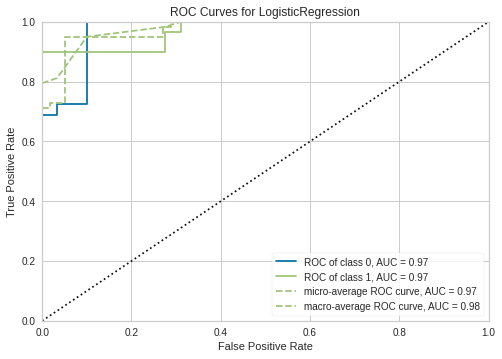

In [83]:
plot_model(tuned)

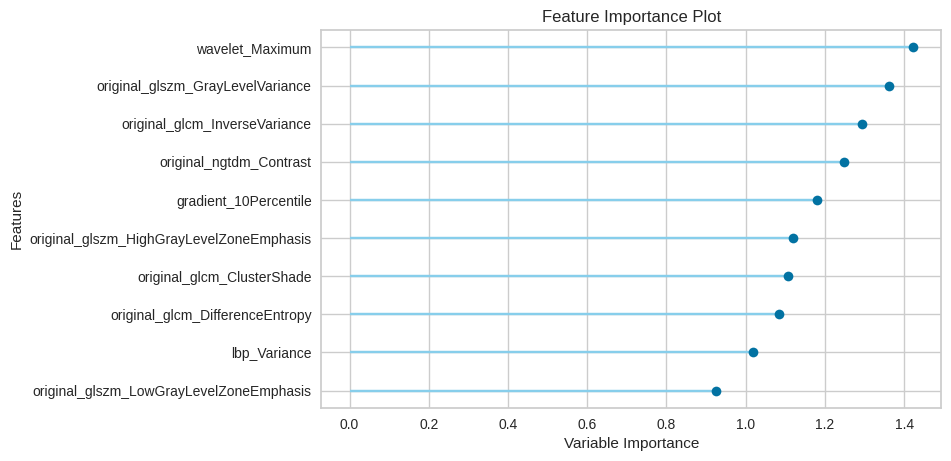

In [87]:
plot_model(tuned, plot='feature')

In [88]:
predict_model(tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9492,0.9713,0.9000,1.0000,0.9474,0.8985,0.9031


,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,...,gradient_Kurtosis,gradient_Maximum,gradient_MeanAbsoluteDeviation,gradient_Minimum,gradient_RobustMeanAbsoluteDeviation,gradient_Uniformity,gradient_Variance,lesion_type,Label,Score
0,0.020349,0.071024,0.390983,-0.128321,-0.030678,0.847754,-0.107100,0.159465,0.238729,-0.193766,...,-0.011407,0.697944,0.231013,-0.802449,0.178543,0.017128,0.091713,CVL,CVL,0.9992
1,0.602783,0.195223,-0.100999,-0.399527,-0.003442,0.420315,-0.407467,0.267648,0.022431,0.261955,...,0.079716,0.590054,0.441110,-0.802449,0.281751,0.476381,0.343461,CVL,CVL,0.9891
2,-0.950374,-1.791965,-0.146148,-0.399527,-0.011187,-1.930599,-0.423235,-1.353808,-1.167209,-0.740631,...,-0.021010,-2.064355,-1.908547,0.524709,-1.729016,-0.503980,-1.688248,MSL,MSL,1.0000
3,1.670578,-0.425773,-3.388738,-1.619954,-0.084425,-1.075721,-1.915328,0.792753,0.671325,2.267126,...,-0.931233,-0.759608,1.567234,-0.802449,1.877368,3.306937,1.395092,MSL,MSL,1.0000
4,-0.367940,-1.791965,-0.882025,-0.806336,-0.241926,-1.716880,-0.985266,-1.175881,-1.167209,-0.102622,...,1.036033,-1.469912,-1.238737,-0.802449,-1.434237,4.428301,-1.187323,MSL,MSL,0.9862
5,-0.659157,-1.667765,-0.330830,-0.670733,0.710938,-1.823739,-0.575396,-1.121496,-0.842762,-0.649486,...,-0.168679,-1.681421,-1.595528,-0.802449,-1.456856,-0.229547,-1.361791,MSL,CVL,0.9595
6,-0.562085,-0.674172,0.457701,-0.399527,0.440471,0.206595,-0.129228,-0.691184,-0.734612,-1.196351,...,1.016162,0.269219,-0.786767,-0.802449,-0.994941,1.097496,-0.755890,CVL,CVL,1.0000
7,-0.076723,0.567820,0.682689,0.414091,-0.166887,1.061473,0.473571,-0.024428,-0.302016,0.444243,...,0.309801,1.191506,0.085624,0.524709,-0.048014,-0.607156,0.088945,CVL,CVL,0.9974
8,0.602783,0.567820,0.052711,0.007282,-0.462558,0.740894,-0.175152,0.486630,0.238729,1.264540,...,-0.531338,0.589561,0.433896,-0.802449,0.449596,-0.845339,0.412024,CVL,CVL,0.9551
9,0.505711,-0.053176,-0.136907,-0.535130,0.631360,-0.113984,-0.565271,0.206009,0.130580,0.079667,...,-0.301362,-0.015010,0.158585,0.524709,0.282148,0.048665,-0.103708,CVL,CVL,0.9907
